In [4]:
# Import Necessary Libraries
import pandas as pd
import numpy as np

# Load the dataset
df=pd.read_csv(r"C:\Users\Tanvi\Desktop\Datasets\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Inspection

# First lets check the data for the following
1. Structure 
2. Missing Values
3. Duplicates 


In [5]:
# Check the data information using df.info()
df.info()
# info will give us the total count of records , memory space used , column names along with their data types 
# and the total null value count of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# To check if the data has any duplicate values use df.duplicated()
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# Observation :
 
For the above data, when I did df.info(), I observed that Age, Cabin and Embarked parameters have missing values since 
the total count of records is 891 and these columns have fewer records than the total


In [7]:
# Check which are the categorical columns and numerical columns
categorical_columns=[col for col in df.columns if df[col].dtype=='object']
numerical_columns=[col for col in df.columns if df[col].dtype!='object']
print('Categorical_columns: ',categorical_columns)
print('Numerical_columns: ',numerical_columns)

Categorical_columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical_columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [8]:
# Check the total number of unique values in categorical columns using nunique()
df[categorical_columns].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [9]:
# Remove all Duplicate and Irrelevant Observantions 
# Duplicate observations most frequently arise during data collection and
# Irrelevant observations are those that don’t actually fit with the specific problem that we’re trying to solve. 
# Duplicate observations most frequently arise during data collection and Irrelevant observations are those
# that don’t actually fit with the specific problem that we’re trying to solve. For the ticket,
# Let’s first print the 50 unique tickets.
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [10]:
# Drop Name and Ticket columns 
df1=df.drop(columns=['Ticket','Name'])
df1.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


# Handling Missing Data 

# Using Imputation
# Or deletion
# Or Substitution

In [11]:
# Check for null Values 
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Check for the percentage of null values
round((df1.isnull().sum()/df1.shape[0])*100,2)
#  we divide it by the total number of rows present 
# in the dataset then we multiply to get values in i.e per 100 values how much values are null.

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [13]:
# As we observe 77% of the values in Cabin are null , so rather than relplacing such big amount of Null values we can drop
# the Cabin column. For Embarked column, only 0.22% are Null values so we can drop the records having Null values from 
# the Embarked column
df2=df1.drop(columns='Cabin')
df2.dropna(subset='Embarked',axis=0,inplace=True)

In [14]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
# Now we need to replace the Age column missing values with appropriate values. 
# Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
# Median imputation is preferable when the data contains outliers or is skewed.
df3=df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Handling Outliers 

Techniques Used :
1. Clustering 
2. Interpolation
3. Transformation

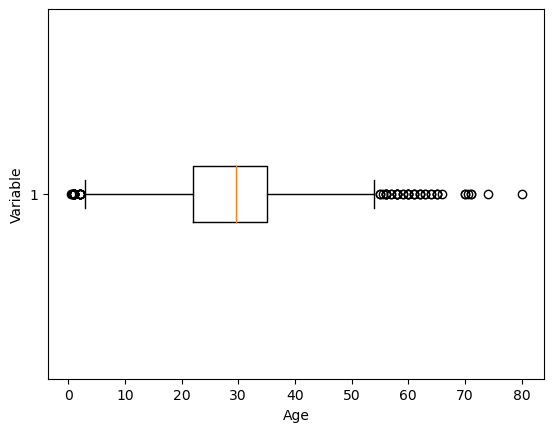

In [16]:
# To check the outliers we generally use a box plot. A box plot is a graphical representation of a dataset’s distribution.
# It shows a variable’s median, quartiles and potential outliers. The line inside the box denotes the median while the box itself
# denotes the interquartile range (IQR). The box plot extend to the most extreme non-outlier values within 1.5 times the IQR. 
# Individual points beyond the box are considered potential outliers.
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'], vert=False)
plt.xlabel('Age')
plt.ylabel('Variable')
plt.show()

In the above boxplot it is clearly observed that Age has outliers . The values below the age 5 and values above the age 55
are considered as outliers

In [17]:
# Calculate mean and standard deviation to further calculate the lower boud and upper bound values
mean=df3['Age'].mean()
std=df3['Age'].std()

# Calculate Lower and upper bound
lower_bound=mean-std*2
upper_bound=mean+std*2
 
print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# Now any values below or above are lower and upper bound are outliers 

#Drop the outliers
df4=df3[(df3['Age']>lower_bound) & (df3['Age']<upper_bound)]


lower_bound =  3.705400107925538
upper_bound =  55.57878528533267


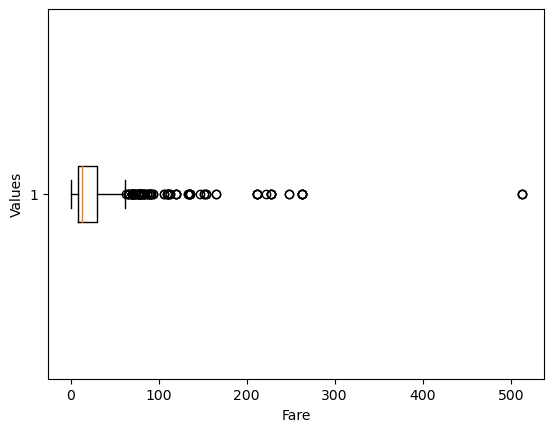

In [18]:
# Lets chcek for outliers in Fair column now
import matplotlib.pyplot as plt

plt.boxplot(df4['Fare'],vert=False)
plt.xlabel('Fare')
plt.ylabel('Values')
plt.show()


The above plot shows that Fare column has outliers. All the Fares ranging above somewhere around 170 are the outliers

In [19]:
# Lets calculate the mean and std for Fare and chcek what are its lower and upper bounds so that we can get rid of the outliers
mean=df4['Fare'].mean()
std=df['Fare'].std()

# Calculating lower and upper bounds
lower_bound=mean-std*2
upper_bound=mean+std*2

print('lower_bound = ',lower_bound)
print('upper_bound = ',upper_bound)

# Values below the lower bound and values above the upper bound are the outliers . But when we look at the above boxplot,
# we see that the lower bound is 0 and there are no values below it . We have only the higher valued outliers.

# Drop the outlier values
df5=df4[(df4['Fare']<upper_bound) & (df4['Fare']>lower_bound)]

lower_bound =  -67.96926766939231
upper_bound =  130.8044467193313


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler 
scaler=StandardScaler()
scaler.fit(df2)


ValueError: could not convert string to float: 'male'